In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from ipywidgets import widgets
import ConfigReader as cr
import itertools as itt

/home/mendozah/workspace/envRoBO/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
markers = itt.cycle(['o', 's', '^', '*'])

In [131]:
reload(cr)

<module 'ConfigReader' from 'ConfigReader.py'>

In [3]:
#Styles
sns.set_style('darkgrid')
sns.set_color_codes()
plt.rcParams['figure.figsize'] = (12.0, 9.0)

plt.rc('text', usetex=False)
plt.rc('font', size=20.0, family='serif')

In [4]:
datasets = ['evita','flora','helena','tania','yolanda']

In [5]:
# Data location
basedata_dir = '/mhome/mendozah/gputrack_extension'
dir_to_save = '/home/mendozah/workspace/gputrack_AutoML/trajectory_plots/'
markers = itt.cycle(['o', 'v', '^', '8', 's', 'p', 'h', 'D'])
reader = cr.ConfigReader(data_dir=basedata_dir)

In [6]:
for d_set in datasets:
    old_dataset = 'results_2404/' + d_set + '_shared/'+ d_set
    dataset = d_set + '_reduced_cs/' + d_set
    best_perf_set = reader.load_trajectories(dataset=old_dataset, preprocessor=None).performance.min()
    print("%s : %f" % (d_set, best_perf_set))
    df_set = reader.load_trajectories(dataset=dataset, preprocessor=None)
    df_set = df_set.sort_values(by='cpu_time')

    fig_set = plt.figure(1, figsize=(15,12))
    with sns.color_palette('Paired',12):
        axs = plt.subplot(111)
        for n,gs in df_set.groupby('run'):
            if int(n.strip("seed_")) > 100:
                continue
            axs.plot(gs.cpu_time, gs.performance, '-',label=n, marker=next(markers), ms=12, mew=1.5, mec='black')
        axs.set_title("Trajectory Performance " + d_set +" Dataset")
        axs.hlines(best_perf_set, 10**2, df_set.cpu_time.max(), linestyles='--', label='Best Config 24.04')
        # axs.set_xscale("log")
        axs.set_xlabel("Time [s]")
        axs.set_ylabel("Performance (X-Val Error)")
        axs.set_xlim(10**2, )
        axs.set_ylim(df_set.performance.min()-0.01, min(1.0,df_set.performance.max()))
        axs.legend(ncol=3)
    plt.tight_layout()
    fig_set.savefig(dir_to_save + d_set +'_compare.png')
    fig_set.clf()

evita : 0.358696
flora : 0.581255
helena : 0.753858
tania : 0.292894
yolanda : 0.908038


In [286]:
from scipy.stats import sem

In [121]:
dset1 = reader.load_trajectory_by_file(os.path.join(basedata_dir, 'helena_reduced_cs','helena','detailed-traj-run-100.csv'),
                                       full_config=False)

In [133]:
dset2 = reader.load_trajectory_by_file(os.path.join(basedata_dir, 'helena_reduced_cs','helena','detailed-traj-run-2000.csv'),
                                                   full_config=False)

In [80]:
for d_set in datasets:
    old_dataset = 'results_2404/' + d_set + '_shared/'+ d_set
    dataset = d_set + '_reduced_cs/' + d_set
    best_perf_set = reader.load_trajectories(dataset=old_dataset, preprocessor=None).performance.min()
    print("%s : %f" % (d_set, best_perf_set))

evita : 0.358696
flora : 0.581255
helena : 0.753858
tania : 0.292894
yolanda : 0.908038


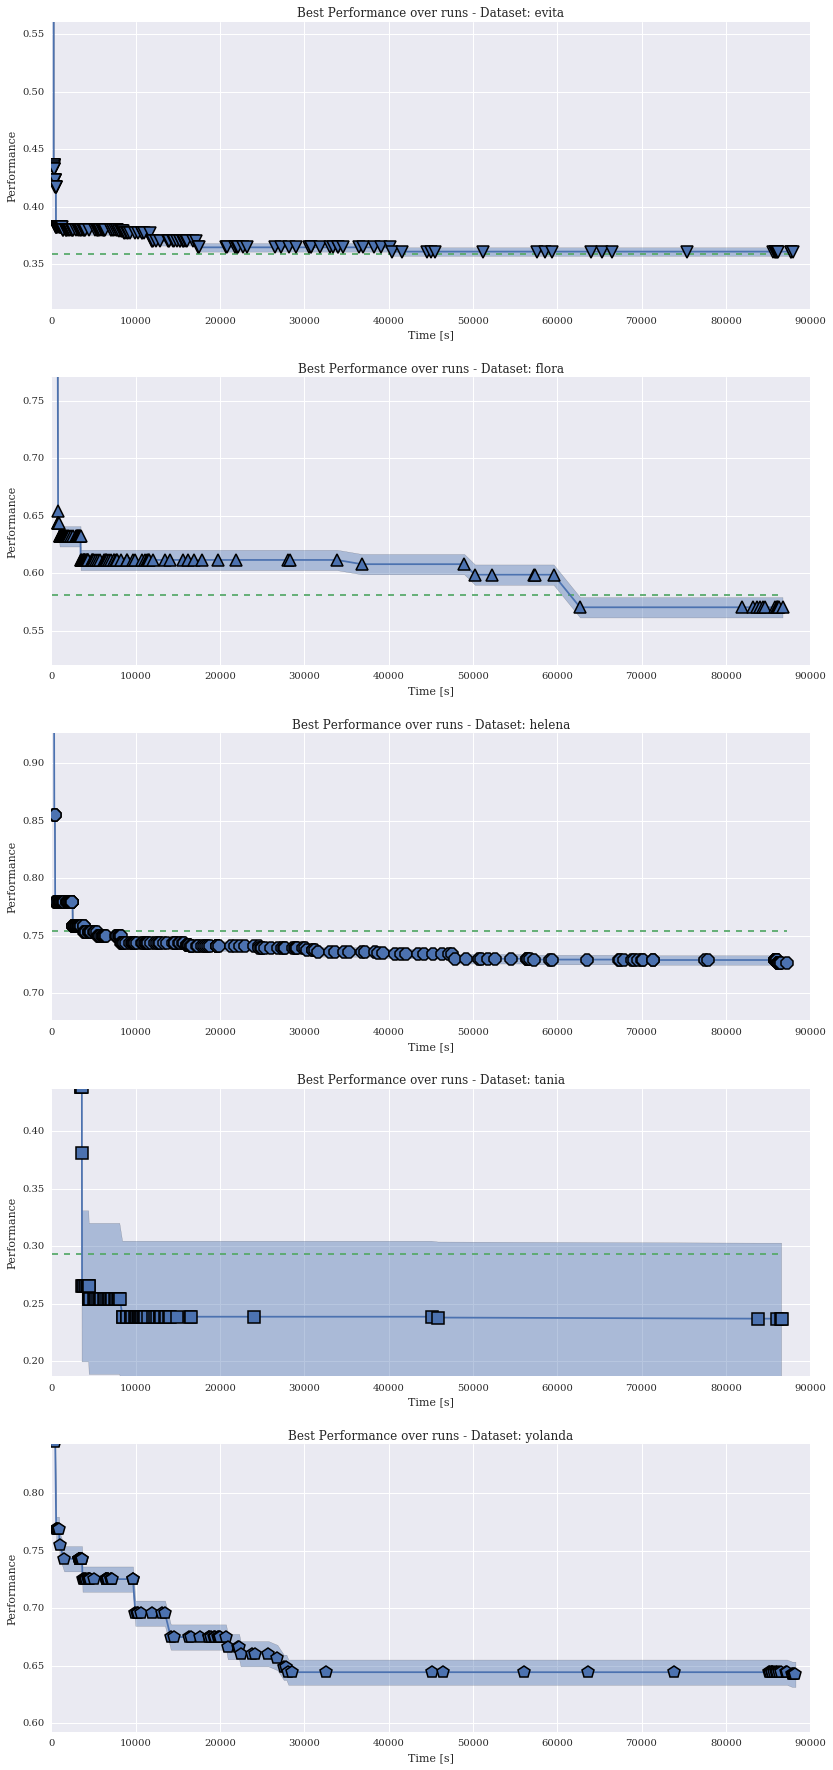

In [13]:
fig_mean, ax_mean = plt.subplots(nrows=len(datasets), figsize=(12.,25.))
for d_set, ax in zip(datasets, ax_mean.flat):
    old_dataset = 'results_2404/' + d_set + '_shared/'+ d_set
    dataset = d_set + '_reduced_cs/' + d_set
    best_perf_set = reader.load_trajectories(dataset=old_dataset, preprocessor=None).performance.min()
    df_set = reader.load_trajectories(dataset=dataset, preprocessor=None)
    df_set = df_set.sort_values(by='cpu_time')

    expand_min = pd.expanding_min(df_set.performance)
    ax.plot(df_set.cpu_time, expand_min, marker=next(markers), ms=12, mew=1.54, mec='black')
    q1_min = expand_min - expand_min.sem()
    q3_min = expand_min + expand_min.sem()
    ax.fill_between(df_set.cpu_time, q1_min, q3_min, alpha=0.4)
    ax.hlines(best_perf_set, 10**2, df_set.cpu_time.max(), linestyles='--', label='Best Performance 24.04', color='g')
    ax.set_ylim(df_set.performance.min()-0.05, min(1.0,df_set.performance.min()+0.20))
    ax.set_ylabel('Performance')
    ax.set_xlabel('Time [s]')
    ax.set_title('Best Performance over runs - Dataset: ' + d_set)
plt.tight_layout()

In [176]:
d_set = 'evita'
old_dataset = 'results_2404/' + d_set + '_shared/'+ d_set
dataset = d_set + '_reduced_cs/' + d_set
best_perf_set = reader.load_trajectories(dataset=old_dataset, preprocessor=None).performance.min()
df_set = reader.load_trajectories(dataset=dataset, preprocessor=None)
df_set = df_set.sort_values(by='cpu_time')

In [146]:
df_set['num_layers_RegDeepNet'] = df_set['num_layers_RegDeepNet'].apply(lambda x: ord(x) - ord('b'))

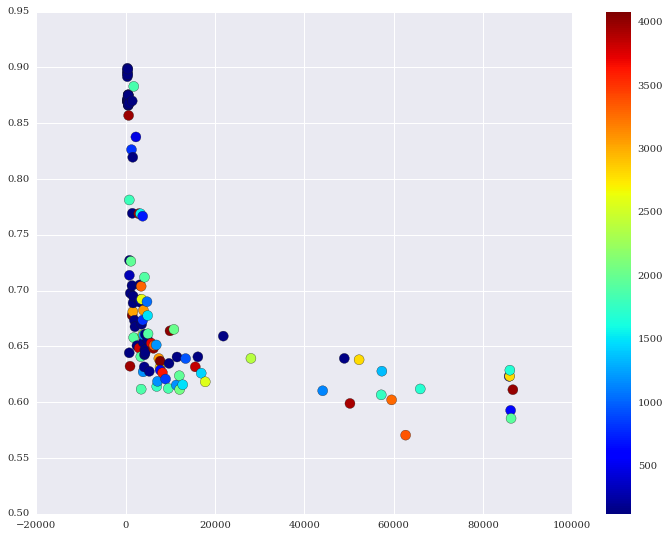

In [147]:
plt.scatter(c=df_set., y=df_set.performance, x=df_set.cpu_time, cmap="jet", s=100)
plt.colorbar()

In [8]:
color_list = itt.cycle(sns.color_palette('Set1',6))

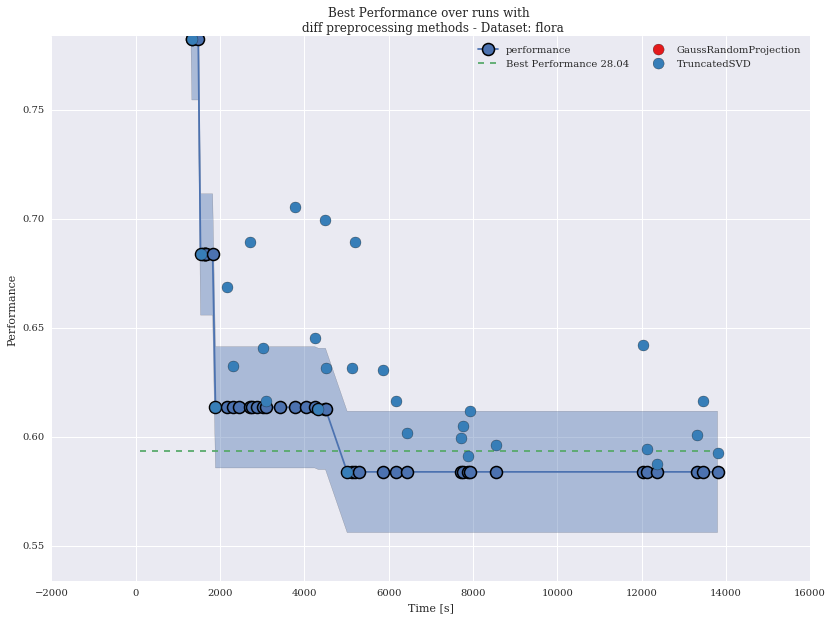

In [12]:
d_set = 'flora'
fig_mean, ax_mean = plt.subplots(nrows=1, figsize=(12.,9.))

old_dataset = d_set + '_reduced_cs/'+ d_set
dataset = d_set + '_grp/' + d_set
best_perf_set = reader.load_trajectories(dataset=old_dataset, preprocessor=None).performance.min()
df_set = reader.load_trajectories(dataset=dataset, preprocessor=None)
df_set = df_set.sort_values(by='cpu_time')

expand_min = pd.expanding_min(df_set.performance)
ax_mean.plot(df_set.cpu_time, expand_min, marker=next(markers), ms=12, mew=1.54, mec='black')
q1_min = expand_min - expand_min.sem()
q3_min = expand_min + expand_min.sem()
ax_mean.fill_between(df_set.cpu_time, q1_min, q3_min, alpha=0.4)
ax_mean.hlines(best_perf_set, 10**2, df_set.cpu_time.max(), linestyles='--', label='Best Performance 28.04', color='g')

for i,(n,g) in enumerate(df_set.groupby('preprocessor')):
    surf = ax_mean.scatter(g.cpu_time, g.performance, c=next(color_list), cmap='jet', label=n, s=120, zorder=13)
ax_mean.set_ylim(df_set.performance.min()-0.05, min(1.0,df_set.performance.min()+0.20))
ax_mean.set_ylabel('Performance')
ax_mean.set_xlabel('Time [s]')
ax_mean.set_title('Best Performance over runs with \n diff preprocessing methods - Dataset: ' + d_set)
ax_mean.legend(ncol=2)
plt.tight_layout()

In [234]:
a = df_set.groupby(['run','preprocessor'])

In [289]:
g.cpu_time.values

array([ 314.60629434,  567.71776457,  958.22267954])

In [285]:
(4 * np.ones(2,)).shape

(2,)